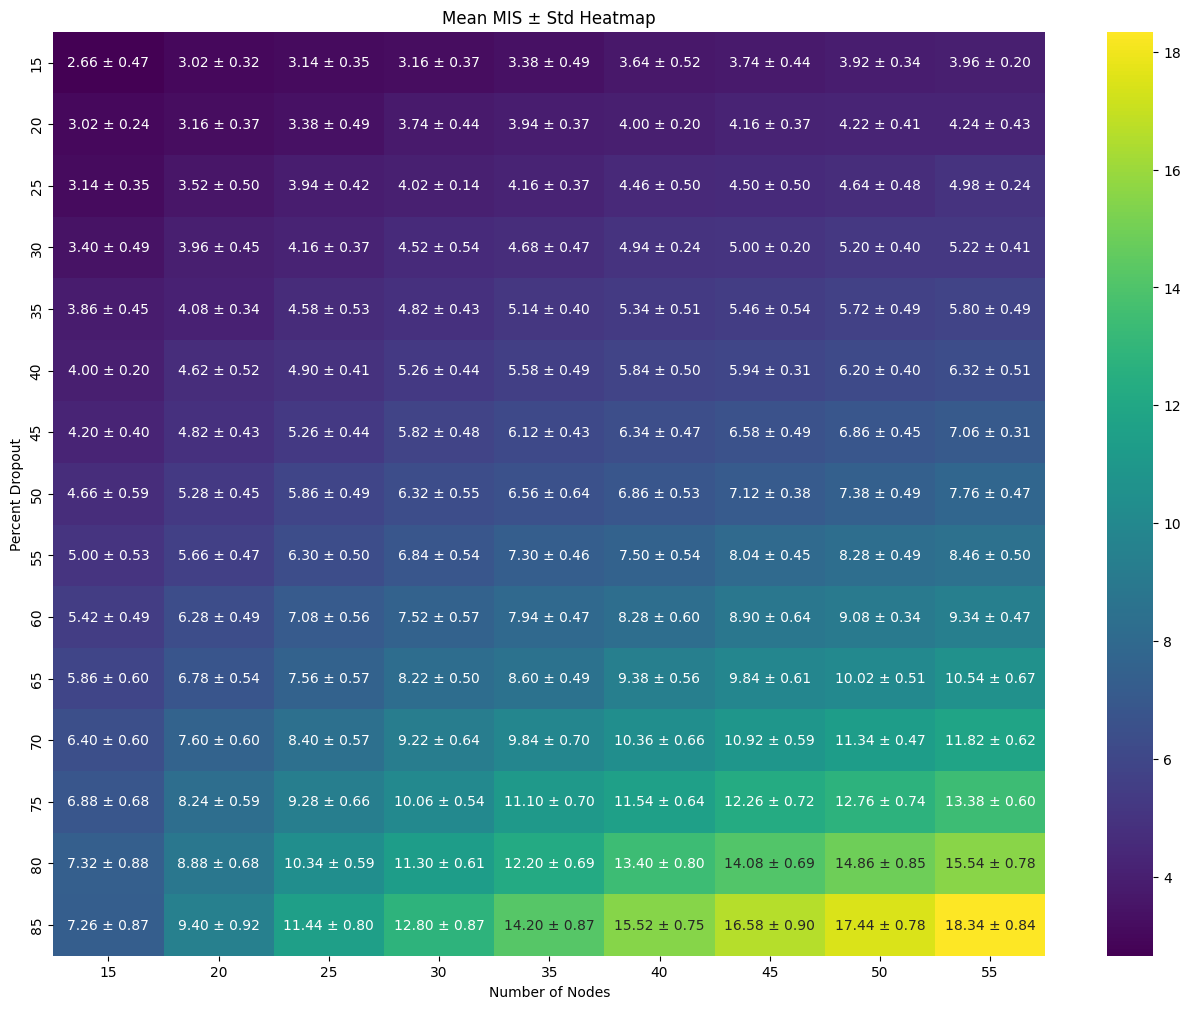

In [10]:
import os
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_mean_std_from_json(directory):
    """
    Loads JSON files from the directory, extracts node count and percent dropout,
    and computes both the mean and standard deviation of MIS for each file.
    Returns a dictionary with keys as (node_count, percent) and values as (mean, std).
    """
    data = {}
    json_pattern = re.compile(r"nodes_(\d+)_removal_(\d+)percent\.json")
    
    for filename in os.listdir(directory):
        if not filename.endswith('.json'):
            continue
        
        match = json_pattern.match(filename)
        if not match:
            continue
        
        n = int(match.group(1))
        percent = int(match.group(2))
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as f:
            results = json.load(f)
        
        # Extract valid MIS sizes for this file
        mis_sizes = [entry["mis_size"] for entry in results if entry["mis_size"] is not None]
        if mis_sizes:
            mean_mis = sum(mis_sizes) / len(mis_sizes)
            std_mis = np.std(mis_sizes)
        else:
            mean_mis = np.nan
            std_mis = np.nan
        
        data[(n, percent)] = (mean_mis, std_mis)
    
    return data

def create_heatmap_with_std(data):
    """
    Given a dictionary with keys (node_count, percent) and values (mean, std),
    creates and displays a heatmap using seaborn.
    The color intensity is based on the mean, and each cell is annotated
    with "mean ± std".
    """
    # Extract unique node counts and percentages
    node_counts = sorted({key[0] for key in data.keys()})
    percents = sorted({key[1] for key in data.keys()})
    
    # Initialize matrices for mean values and annotation texts
    mean_matrix = np.full((len(percents), len(node_counts)), np.nan)
    annot_matrix = np.empty((len(percents), len(node_counts)), dtype=object)
    
    # Fill the matrices with data
    for (n, percent), (mean_val, std_val) in data.items():
        row = percents.index(percent)
        col = node_counts.index(n)
        mean_matrix[row, col] = mean_val
        annot_matrix[row, col] = f"{mean_val:.2f} ± {std_val:.2f}"
    
    # Create the heatmap with seaborn
    plt.figure(figsize=(16, 12))
    ax = sns.heatmap(
        mean_matrix, 
        annot=annot_matrix, 
        fmt="",  # fmt is not used since annot_matrix already contains formatted strings
        xticklabels=node_counts, 
        yticklabels=percents, 
        cmap="viridis"
    )
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Percent Dropout")
    ax.set_title("Mean MIS ± Std Heatmap")
    plt.show()

# Set the directory containing your JSON files
json_dir = "mis_results_grouped"

# Load data from JSON files and compute mean and std values
data = load_mean_std_from_json(json_dir)

# Create and display the heatmap with mean ± std annotations
create_heatmap_with_std(data)


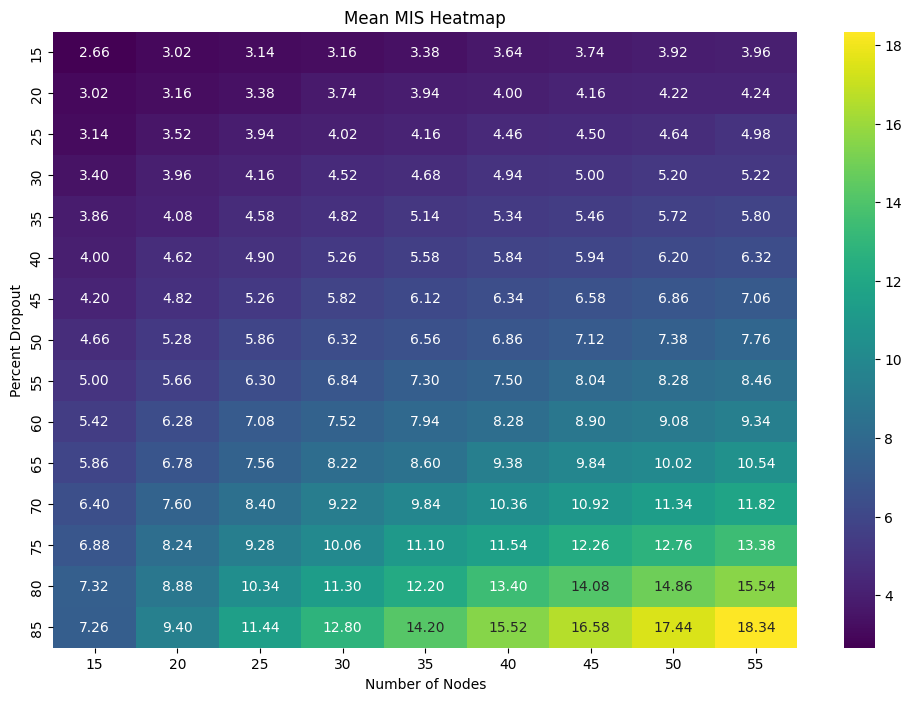

In [12]:
import os
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_mean_mis_from_json(directory):
    """
    Loads JSON files from the directory, extracts node count and percent dropout,
    and computes the mean MIS for each file.
    Returns a dictionary with keys as (node_count, percent) and values as mean MIS.
    """
    data = {}
    json_pattern = re.compile(r"nodes_(\d+)_removal_(\d+)percent\.json")
    
    for filename in os.listdir(directory):
        if not filename.endswith('.json'):
            continue
        
        match = json_pattern.match(filename)
        if not match:
            continue
        
        n = int(match.group(1))
        percent = int(match.group(2))
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as f:
            results = json.load(f)
        
        # Compute mean MIS size for this file
        mis_sizes = [entry["mis_size"] for entry in results if entry["mis_size"] is not None]
        if mis_sizes:
            mean_mis = sum(mis_sizes) / len(mis_sizes)
        else:
            mean_mis = np.nan  # If no valid MIS size found
        
        data[(n, percent)] = mean_mis
    
    return data

def create_heatmap(data):
    """
    Given a dictionary with keys (node_count, percent) and mean MIS values,
    creates and displays a heatmap using seaborn.
    """
    # Extract unique node counts and percentages
    node_counts = sorted({key[0] for key in data.keys()})
    percents = sorted({key[1] for key in data.keys()})
    
    # Initialize a matrix to hold mean MIS values
    heatmap_data = np.full((len(percents), len(node_counts)), np.nan)
    
    # Fill the matrix with mean MIS data
    for (n, percent), mean_mis in data.items():
        row = percents.index(percent)
        col = node_counts.index(n)
        heatmap_data[row, col] = mean_mis
    
    # Create the heatmap with seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        xticklabels=node_counts, 
        yticklabels=percents, 
        cmap="viridis"
    )
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Percent Dropout")
    ax.set_title("Mean MIS Heatmap")
    plt.show()

# Set the directory containing your JSON files
json_dir = "mis_results_grouped"

# Load data from JSON files and compute mean MIS values
data = load_mean_mis_from_json(json_dir)

# Create and display the heatmap
create_heatmap(data)
